# Анализ рынка недвижимости (Реутов, 2016 г.)

В нашем распоряжении есть база данных квартир, выставленных на продажу в г.Реутов в 2016 году (скачано из открытых источников). Задача - основываясь на этих данных подготовить аналитический отчет, освещающий рынок недвижимости в соответствующий период.

***Цель***

Подготовить аналитическую записку с описанием рынка недвижимости в г.Реутов за 2016 г.

***Ход исследования***

1. Обзор данных
2. Предобработка
3. Исследовательский анализ
4. Визуализация на карте
5. Выводы

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from IPython.display import Image

from datetime import datetime as dt

import folium
from folium.plugins import Search
from folium.plugins import HeatMap, Fullscreen

C:\Users\79199\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Обзор

In [2]:
df = pd.read_csv('C://Users//79199//Documents//job_search//pet_projects//недвижимость//Reutov_mos_obl.csv', parse_dates=['OnDate'])
df.head(10)

,ID,Region,City,Address,MinPricePerSqMeter,AvgPricePerSqMeter,MaxPricePerSqMeter,OffersCount,TotalFloors,YaLowerCorner,YaUpperCorner,WktPoint,Lat,Lon,OnDate,Source
0,142671,Московская область,Реутов,"Московская область, Реутов, улица Октября, 48",99000,107000,123000,8,25,37.879081 55.75363,37.887292 55.75826,POINT(37.883186 55.755945),55.755945,37.883186,2016-10-01,myData.biz
1,142672,Московская область,Реутов,"Московская область, Реутов, улица Котовского, 6",116000,123000,133000,5,9,37.860576 55.746259,37.868786 55.75089,POINT(37.864681 55.748574),55.748574,37.864681,2016-10-01,myData.biz
2,142673,Московская область,Реутов,"Московская область, Реутов, улица Гагарина, 40",129000,137000,145000,6,20,37.863639 55.758661,37.871849 55.76329,POINT(37.867744 55.760975),55.760975,37.867744,2016-10-01,myData.biz
3,142674,Московская область,Реутов,"Московская область, Реутов, улица Реутовских о...",84000,91000,98000,2,25,37.842726 55.768972,37.850937 55.773601,POINT(37.846831 55.771287),55.771287,37.846831,2016-10-01,myData.biz
4,142675,Московская область,Реутов,"Московская область, Реутов, улица Октября, 44",88000,102000,119000,6,25,37.877383 55.753301,37.885594 55.757931,POINT(37.881488 55.755616),55.755616,37.881488,2016-10-01,myData.biz
5,142676,Московская область,Реутов,"Московская область, Реутов, улица Некрасова, 26",115000,123000,133000,3,12,37.847209 55.770623,37.855419 55.775251,POINT(37.851314 55.772937),55.772937,37.851314,2016-10-01,myData.biz
6,142677,Московская область,Реутов,"Московская область, Реутов, Носовихинское шосс...",105000,126000,142000,33,25,37.872775 55.747241,37.880985 55.751872,POINT(37.87688 55.749557),55.749557,37.876880,2016-10-01,myData.biz
7,142678,Московская область,Реутов,"Московская область, Реутов, улица Октября, 52",90000,110000,127000,17,25,37.880383 55.753899,37.888594 55.758529,POINT(37.884489 55.756214),55.756214,37.884489,2016-10-01,myData.biz
8,142679,Московская область,Реутов,"Московская область, Реутов, улица Октября, 42",94000,140000,156000,10,25,37.87626 55.752374,37.884471 55.757004,POINT(37.880366 55.754689),55.754689,37.880366,2016-10-01,myData.biz
9,142680,Московская область,Реутов,"Московская область, Реутов, Юбилейный проспект...",99000,111000,134000,7,25,37.882566 55.753174,37.890777 55.757805,POINT(37.886672 55.75549),55.755490,37.886672,2016-10-01,myData.biz


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  233 non-null    int64         
 1   Region              233 non-null    object        
 2   City                233 non-null    object        
 3   Address             233 non-null    object        
 4   MinPricePerSqMeter  233 non-null    int64         
 5   AvgPricePerSqMeter  233 non-null    int64         
 6   MaxPricePerSqMeter  233 non-null    int64         
 7   OffersCount         233 non-null    int64         
 8   TotalFloors         233 non-null    int64         
 9   YaLowerCorner       233 non-null    object        
 10  YaUpperCorner       233 non-null    object        
 11  WktPoint            233 non-null    object        
 12  Lat                 233 non-null    float64       
 13  Lon                 233 non-null    float64       

- пропусков нет
- в датасете присутствуют долгота, широта и wkt, что упростит визуализацию объектов

### Описание данных

Т.к. описания полей к базе данных не прилагалось, приведем наиболее вероятное их объяснение.

- `ID` - идентификатор объекта   
- `Region` - регион
- `City` - город      
- `Address` - адрес
- `MinPricePerSqMeter` - минимальная цена за кв.метр
- `AvgPricePerSqMeter` - средняя цена за кв.метр 
- `MaxPricePerSqMeter` - максимальная цена за кв.метр
- `OffersCount` - количество предложений       
- `TotalFloors` - этажей в доме    
- `YaLowerCorner` - параметры геоточки
- `YaUpperCorner` - параметры геоточки
- `WktPoint` - параметры геоточки  
- `Lat` - широта
- `Lon` - долгота
- `OnDate` - дата выставления на продажу
- `Source` - источник

Поле с датой было сразу переведено в формат `datetime`.

In [4]:
# убедимся, что источник данных один
df['Source'].nunique()

1

## Предобработка

In [5]:
# удалим лишние столбцы
df = df.drop(['Source', 'Region', 'City'], axis=1)

In [6]:
df.columns

Index(['ID', 'Address', 'MinPricePerSqMeter', 'AvgPricePerSqMeter',
       'MaxPricePerSqMeter', 'OffersCount', 'TotalFloors', 'YaLowerCorner',
       'YaUpperCorner', 'WktPoint', 'Lat', 'Lon', 'OnDate'],
      dtype='object')

In [7]:
# приведем названия столбцов к стандартному виду
df = df.rename(columns={'ID':'id', \
                        'Address':'address', \
                        'MinPricePerSqMeter':'min_price', \
                        'AvgPricePerSqMeter':'avg_price', \
                        'MaxPricePerSqMeter':'max_price', \
                        'OffersCount':'offers_count', \
                        'TotalFloors':'total_floors', \
                        'YaLowerCorner':'lower_corner', \
                        'YaUpperCorner':'upper_corner', \
                        'WktPoint':'wkt_point', \
                        'Lat':'lat', \
                        'Lon':'lon', \
                        'OnDate':'date'})
df.head(5)

,id,address,min_price,avg_price,max_price,offers_count,total_floors,lower_corner,upper_corner,wkt_point,lat,lon,date
0,142671,"Московская область, Реутов, улица Октября, 48",99000,107000,123000,8,25,37.879081 55.75363,37.887292 55.75826,POINT(37.883186 55.755945),55.755945,37.883186,2016-10-01
1,142672,"Московская область, Реутов, улица Котовского, 6",116000,123000,133000,5,9,37.860576 55.746259,37.868786 55.75089,POINT(37.864681 55.748574),55.748574,37.864681,2016-10-01
2,142673,"Московская область, Реутов, улица Гагарина, 40",129000,137000,145000,6,20,37.863639 55.758661,37.871849 55.76329,POINT(37.867744 55.760975),55.760975,37.867744,2016-10-01
3,142674,"Московская область, Реутов, улица Реутовских о...",84000,91000,98000,2,25,37.842726 55.768972,37.850937 55.773601,POINT(37.846831 55.771287),55.771287,37.846831,2016-10-01
4,142675,"Московская область, Реутов, улица Октября, 44",88000,102000,119000,6,25,37.877383 55.753301,37.885594 55.757931,POINT(37.881488 55.755616),55.755616,37.881488,2016-10-01


In [8]:
min_date = df['date'].min()
print('Дата первого объявления: ', min_date)
max_date = df['date'].max()
print('Дата последнего объявления: ', max_date)

Дата первого объявления:  2016-09-01 00:00:00
Дата последнего объявления:  2016-11-01 00:00:00


In [9]:
# сводная таблица для кол-ва выставленных на продажу квартир по датам
display(pd.pivot_table(df, index=['date'], values=['address'], aggfunc='count'))

,address
date,
2016-09-01,33
2016-10-01,193
2016-11-01,7


In [10]:
# дубликаты
df.duplicated().sum() #явные

0

In [11]:
df['address'].sort_values().unique() # неявные

array(['Московская область, Балашиха, микрорайон Салтыковка, Носовихинское шоссе, 35',
       'Московская область, Балашиха, микрорайон Салтыковка, Носовихинское шоссе, 69',
       'Московская область, Реутов, Ашхабадская улица, 19Б',
       'Московская область, Реутов, Ашхабадская улица, 23',
       'Московская область, Реутов, Ашхабадская улица, 25',
       'Московская область, Реутов, Ашхабадская улица, 27',
       'Московская область, Реутов, Ашхабадская улица, 27к1',
       'Московская область, Реутов, Ашхабадская улица, 27к2',
       'Московская область, Реутов, Ашхабадская улица, 27к3',
       'Московская область, Реутов, Ашхабадская улица, 33',
       'Московская область, Реутов, Комсомольская улица, 10',
       'Московская область, Реутов, Комсомольская улица, 10к1',
       'Московская область, Реутов, Комсомольская улица, 12',
       'Московская область, Реутов, Комсомольская улица, 14',
       'Московская область, Реутов, Комсомольская улица, 18/2',
       'Московская област

### Промежуточные выводы

Мы удалили лишние столбцы `Source`, `Region` и`City` (не несли смысловой нагрузки, т.к. все объекты находятся в Реутове Московской области, а источник данных один), привели названия столбцов в более удобный вид, убедились в отсутствии явных и неявных дубликатов.

Были установлены временные рамки датасета - с 1 сентября 2016 по 1 ноября 2016 гг., т.е. выяснилось, что информация по выставлению квартир на продажу дана не за весь год, а всего за два месяца. Кроме того, даты округлены до 1-го числа месяца, поэтому проследить, как меняется динамика предложений по дням, либо как она зависит от дней недели, не получится. Пока мы лишь видим, что на 1.10 продается почти в шесть раз больше квартир, чем на 1.09 (возможно, сезонный скачок), а с октября по ноябрь роста почти не происходит.

## Исследовательский анализ

Посмотрим, как распределяются цены за квадратный метр.

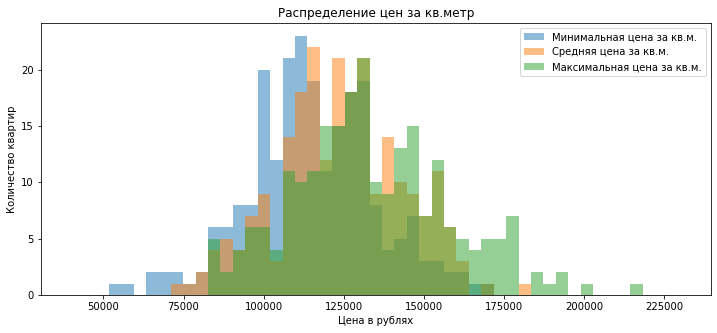

In [12]:
# гистограмма с ценами (мин, ср., макс)

plt.figure(figsize=(12, 5))

bins = np.linspace(40000, 230000, 50)

plt.hist(df['min_price'], bins, alpha = 0.5, label='Минимальная цена за кв.м.')
plt.hist(df['avg_price'], bins, alpha = 0.5, label='Средняя цена за кв.м.')
plt.hist(df['max_price'], bins, alpha = 0.5, label='Максимальная цена за кв.м.')
plt.legend(loc='upper right')
plt.title('Распределение цен за кв.метр')
plt.xlabel('Цена в рублях')
plt.ylabel('Количество квартир')

plt.show()

In [13]:
# 
df[['min_price', 'avg_price', 'max_price']].describe().T

,count,mean,std,min,25%,50%,75%,max
min_price,233.0,115158.798283,20189.097910,54000.0,102000.0,114000.0,128000.0,170000.0
avg_price,233.0,124141.630901,19707.814635,73000.0,111000.0,124000.0,137000.0,182000.0
max_price,233.0,133759.656652,24522.556539,83000.0,117000.0,132000.0,148000.0,215000.0


Мы видим разброс от 54_000 до 215_000 р. за кв.м. Медианное значение средней цены - 124_000 р. за кв.м.

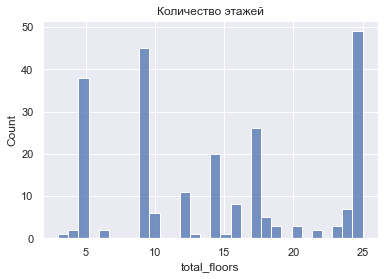

In [14]:
# этажность
sns.set(style="darkgrid")

sns.histplot(data=df, x="total_floors", bins=30)
plt.title('Количество этажей')
plt.show()

Эта гистограмма хорошо отображает типовую застройку города (пяти, восьми и двадцатичетырехэтажные высотки).

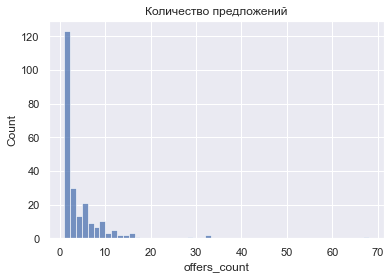

In [15]:
# спрос
sns.set(style="darkgrid")

sns.histplot(data=df, x="offers_count")
plt.title('Количество предложений')
plt.show()

Чаще всего поступает одно предложение на покупку квартиру (предположительно, сразу ведущее к сделке купли-продажи), больше десяти предложений - редкость. Рассмотрим эти необычные случаи подробнее.

In [16]:
pd.options.display.max_colwidth = 150
print('Квартиры с наибольшим спросом (более 10 запросов): ')
print(df[df.offers_count > 10]['address'])
print()
print('Всего:', (df[df.offers_count > 10]['address']).count(), 'адресов.')

Квартиры с наибольшим спросом (более 10 запросов): 
6      Московская область, Реутов, Носовихинское шоссе, 27
7            Московская область, Реутов, улица Октября, 52
11      Московская область, Реутов, Юбилейный проспект, 72
17      Московская область, Реутов, Юбилейный проспект, 51
18      Московская область, Реутов, Комсомольская улица, 2
21      Московская область, Реутов, Юбилейный проспект, 42
24         Московская область, Реутов, Парковая улица, 8к1
28     Московская область, Реутов, Носовихинское шоссе, 25
37      Московская область, Реутов, Юбилейный проспект, 16
43      Московская область, Реутов, Юбилейный проспект, 63
47      Московская область, Реутов, улица Головашкина, 3к1
53     Московская область, Реутов, Комсомольская улица, 14
54           Московская область, Реутов, микрорайон 6А, к7
63           Московская область, Реутов, улица Октября, 28
91           Московская область, Реутов, микрорайон 6А, к4
120     Московская область, Реутов, Юбилейный проспект, 37
134 

In [17]:
print('Квартиры с наибольшим спросом (более 30 запросов): ')
print(df[df.offers_count > 30]['address'])
print()
print('Всего:', (df[df.offers_count > 30]['address']).count(), 'адреса.')

Квартиры с наибольшим спросом (более 30 запросов): 
6     Московская область, Реутов, Носовихинское шоссе, 27
18     Московская область, Реутов, Комсомольская улица, 2
47     Московская область, Реутов, улица Головашкина, 3к1
Name: address, dtype: object

Всего: 3 адреса.


Если мы правильно истолковали поле `offers_count`, то самые популярные квартиры располагаются преимущественно на Юбилейном проспекте, ул.Октября, Носовихинском шоссе и микрорайоне 6А.

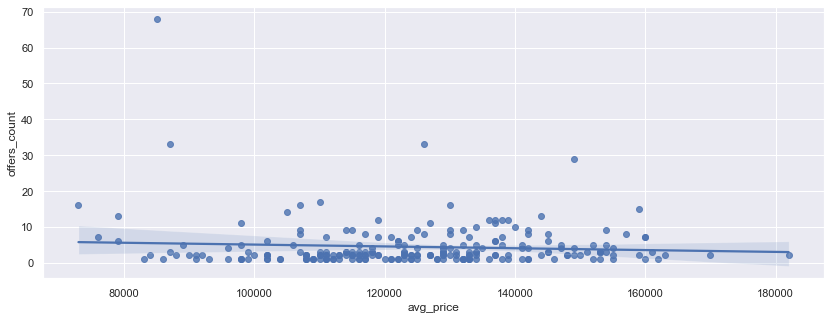

In [18]:
# зависимость количества предолжений о покупке от средней цены за кв.м.
plt.figure(figsize=(14, 5))
sns.regplot(x=df["avg_price"], y=df["offers_count"])
plt.show()

За исключением нескольких выбросов, мы видим, что наибольшая концентрация предложений приходится на средние значения по цене, с тенденцией небольшого снижения по мере увеличения цены за кв.м.

### Промежуточные выводы

В ходе исследовательского анализа данных было выявлено, что разброс цен за квадратный метр в Реутове составляет от 54_000 до 215_000, с медианным значением в 124_000 р. за кв.м. В городе преобладает типовая застройка пяти, восьми и двадцатичетырехэтажными зданиями, хотя есть предложения по квартирам и в двух-трехэтажках.
Чаще всего делается не более одного предложения по квартире, реже - до десяти предложений. На Юбилейном проспекте, ул.Октября, Носовихинском шоссе и микрорайоне 6А расположены квартиры, по которым сделано более десяти предложений (в общей сложности 20 адресов).

## Геолокация

In [19]:
# список "ширина-долгота"
df[['lat', 'lon']].groupby(['lat', 'lon']).min().reset_index().values.tolist()

[[55.745853, 37.859758],
 [55.745863, 37.861734],
 [55.745889, 37.856659],
 [55.745929, 37.853883],
 [55.745949, 37.858078],
 [55.746106, 37.850101],
 [55.746172, 37.864429],
 [55.746613, 37.846885],
 [55.746704, 37.86699],
 [55.746846, 37.849993],
 [55.746922, 37.854611],
 [55.746963, 37.863387],
 [55.746988, 37.861573],
 [55.747044, 37.855734],
 [55.747044, 37.857773],
 [55.747277, 37.858671],
 [55.747282, 37.84835],
 [55.747535, 37.866936],
 [55.747551, 37.84941],
 [55.747824, 37.84693],
 [55.747926, 37.871706],
 [55.747971, 37.856911],
 [55.748088, 37.853668],
 [55.748148, 37.865651],
 [55.748184, 37.870493],
 [55.748331, 37.862768],
 [55.748331, 37.875344],
 [55.748376, 37.85921],
 [55.748473, 37.848368],
 [55.748534, 37.861312],
 [55.748574, 37.864681],
 [55.748721, 37.872308],
 [55.748762, 37.869101],
 [55.748792, 37.851862],
 [55.748807, 37.871266],
 [55.748827, 37.862588],
 [55.748898, 37.86752],
 [55.748949, 37.850425],
 [55.749005, 37.863711],
 [55.749005, 37.878506],
 [55.7

При отрисовке тепловой карты возникла проблема, не связанная с работой кода. Библиотека folium обращается к картам leaflet на основе OpenSourceMap, где неожиданно подробно расписаны прилегающие к Москве промзоны и их содержимое. Учитывая реалии 2023 г. было принято решение не выкладывать интерактивную карту в открытый доступ и ограничиться скриншотом жилых районов. Код для отрисовки интерактивной карты закомменчен.

In [20]:
# отрисовка карты
'''base_map = folium.Map(location=[55.745853, 37.859758], control_scale=False, zoom_start=9)

data = df[['lat', 'lon']].groupby(['lat', 'lon']).min().reset_index().values.tolist()
HeatMap(data=data, radius=10, max_zoom=5,
        blur=10).add_to(base_map)

base_map'''


"base_map = folium.Map(location=[55.745853, 37.859758], control_scale=False, zoom_start=9)\n\ndata = df[['lat', 'lon']].groupby(['lat', 'lon']).min().reset_index().values.tolist()\nHeatMap(data=data, radius=10, max_zoom=5,\n        blur=10).add_to(base_map)\n\nbase_map"

Тепловая карта выставленных на продажу квартир в г. Реутов в сентябре-ноябре 2016 г.


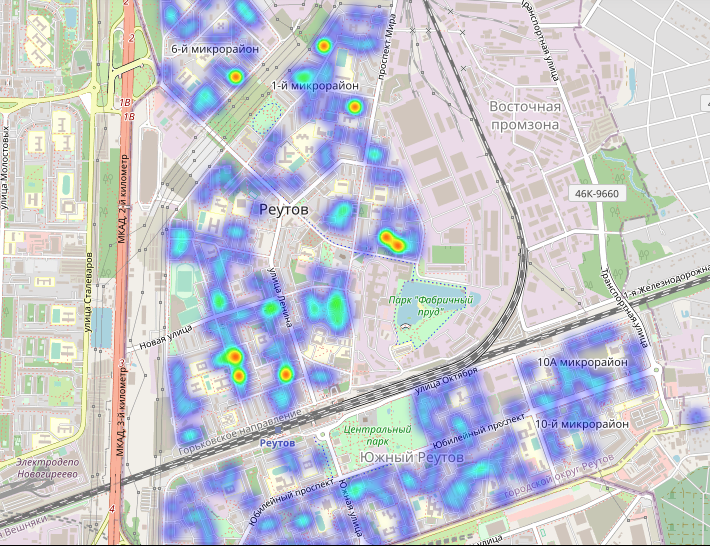

In [21]:
print('Тепловая карта выставленных на продажу квартир в г. Реутов в сентябре-ноябре 2016 г.')
Image("C://Users//79199//Documents//job_search//pet_projects//2023-07-04_06-58-26.png", width=620, height=340)

Как видим, предлагаемые к продаже квартиры довольно равномерно распределены по городу. Между жилыми районами и МКАД пролегает нежилая полоса из АЗС и ТЦ, в то время как к железной дороге жилые дома подходят вплотную, и визуально это никак не влияет на количество продаваемых в этих домах квартир. "Пустые" места на карте - это промзоны (НПО машиностроения и Реутовская мануфактура).

## Общие выводы

В рамках исследования были проведены обзор и предварительная обработка данных, датасет приведен к стандартному виду. В ходе предобработки выяснилось, что данные приведены всего за два месяца, сентябрь и октябрь 2016 г., причем датасет заполнялся не по дням, а первого числа каждого месяца. Это затрудняет анализ динамики рынка, можно лишь выдвинуть предположение о летнем сезонном спаде и активизации продаж осенью. Для более точного анализа требуется больше данных.

Медианная цена за кв.м. в Реутове - 124 000 р., разброс от 54 000 до 215 000 р. К сожалению, описание полей к датасету не прилагалось, но если предположить, что столбец `offers_count` означает количество предложений о покупке по каждой квартире, мы видим, что в преобладающем числе случаев квартира продается после первого же предложения. В остальных случаях поступает до десяти предложений, от десяти до тридцати предложений за квартиру - скорее исключение. Тенденция к снижению спроса по мере увеличения цены есть, но небольшая.

При отрисовке расположения квартир по координатам было принято решение отказаться от интерактивной карты и ограничиться скриншотом жилых районов. По карте можно сделать вывод, что продаваемые квартиры распределены по городу относительно равномерно, районов, где предложение было бы особенно активно или отсутствовало бы вовсе, не наблюдается (квартиры активно продаются даже в домах, вплотную прилегающих к железной дороге и промзонам). В дальнейшем было бы интересно установить, влияет ли на цену квартир расстояние до МКАД, железной дороге, промзон, парков и центральной площади, существует ли разница в ценах между Южным и Северным Реутовом.